2nd question

181
75
256


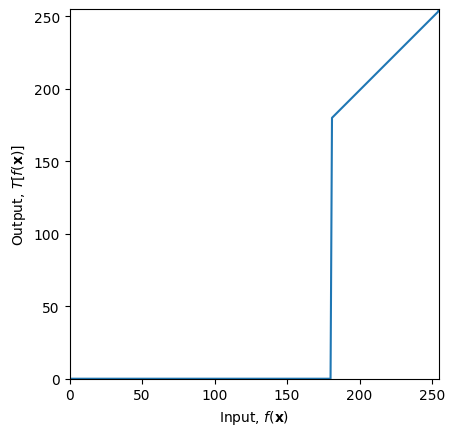

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, 0, 181).astype('uint8')
print(len(t1))

t2 = np.linspace( 180, 255, 255 - 180).astype('uint8')
print(len(t2))

# t3 = np.linspace(c[1, 1] + 1, 255, 255 - c[1, 0]).astype('uint8')
# print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
# transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $T[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
image_transformed = np.clip(image_transformed, 0, 255).astype(np.uint8)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

131
50
75
256


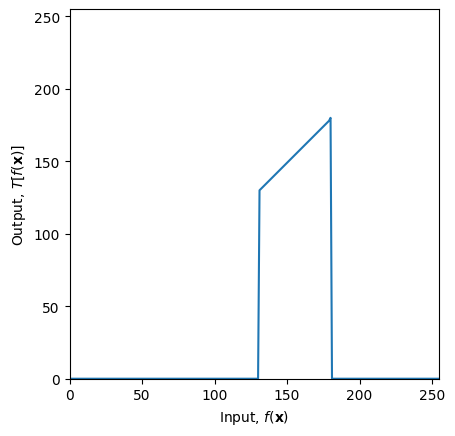

In [3]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, 0, 131).astype('uint8')
print(len(t1))
t2 = np.linspace( 130, 180, 180-130).astype('uint8')
print(len(t2))
t3 = np.linspace(0, 0, 255 - 180).astype('uint8')
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)



fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $T[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
# ax.set_aspect('equal')
# plt.savefig('transform.png')
plt.show()


cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
image_transformed = np.clip(image_transformed, 0, 255).astype(np.uint8)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

Q3 Gamma   

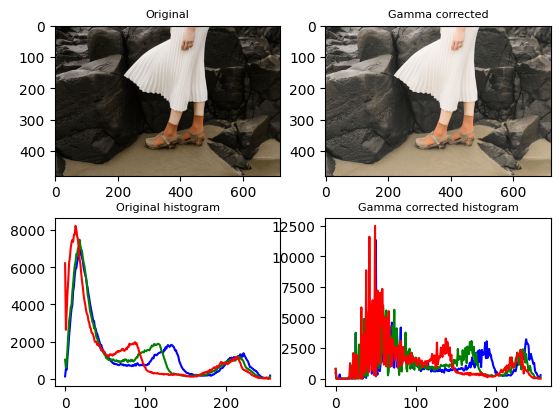

In [13]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# read the image
img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
# convert to LAB color space
img_gamma = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
img_L = img_gamma[:,:,0]
# apply gamma correction to the L channel
gamma = 2
table = np.array([(i/255.0)**(1.0/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_L_gamma = cv.LUT(img_L, table)
img_gamma[:,:,0] = img_L_gamma
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

# plot the images and their histograms
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(img_orig)
axarr[0,0].set_title('Original', size=8)
axarr[0,1].imshow(img_gamma)
axarr[0,1].set_title('Gamma corrected', size=8)
axarr[1,0].set_title('Original histogram', size=8)
axarr[1,1].set_title('Gamma corrected histogram', size=8)

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0,256])
    axarr[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    axarr[1,1].plot(hist_gamma, color = c)    


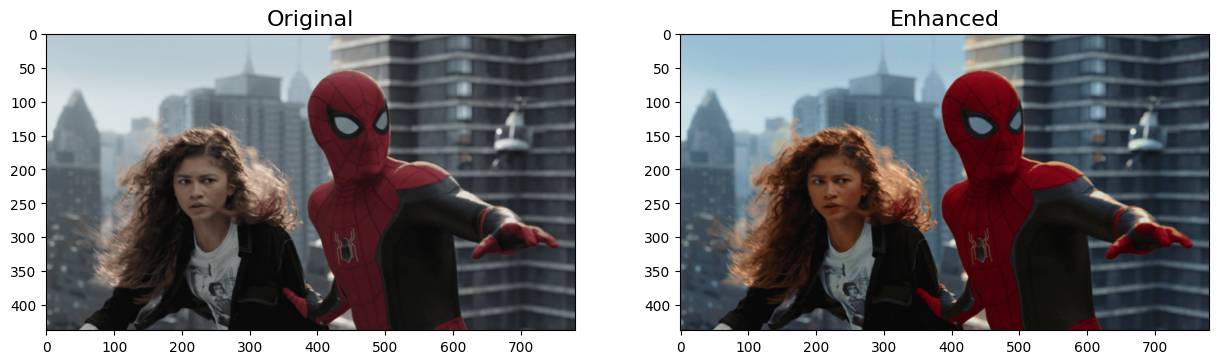

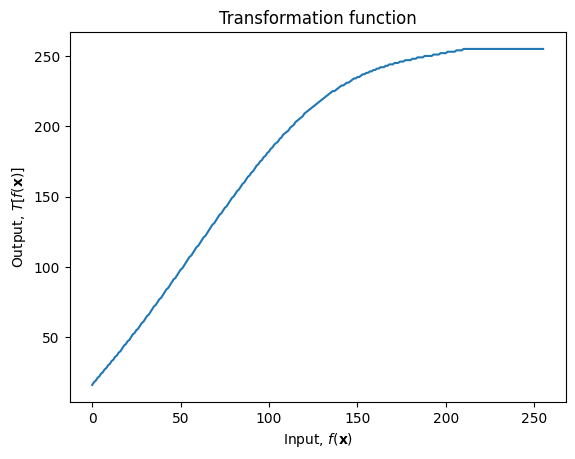

In [26]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


img_orig = cv.imread('spider.png', cv.IMREAD_COLOR)
# Convert img_orig to HSV
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
# Get the saturation channel
img_s = img_hsv[:,:,1]

# Define the transformation function
def transform(x, a, sigma):
    return min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)

a = 0.7
sigma = 70
# Generate the LUT using the transformation function
table = np.array([transform(i, a, sigma) for i in np.arange(0, 256)]).astype('uint8')
# Apply the LUT to the saturation channel
img_s_transformed = cv.LUT(img_s, table)

#recombine image
img_hsv[:,:,1] = img_s_transformed
img_enhanced = cv.cvtColor(img_hsv, cv.COLOR_HSV2BGR)

# Plot original and transformed image
f, axarr = plt.subplots(1, 2, figsize=(15, 10))
axarr[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axarr[0].set_title('Original', size=16)
axarr[1].imshow(cv.cvtColor(img_enhanced, cv.COLOR_BGR2RGB))
axarr[1].set_title('Enhanced', size=16)
plt.show()
fig, ax = plt.subplots()
ax.plot(table)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $T[f(\mathbf{x})]$')
ax.set_title('Transformation function')
plt.show()



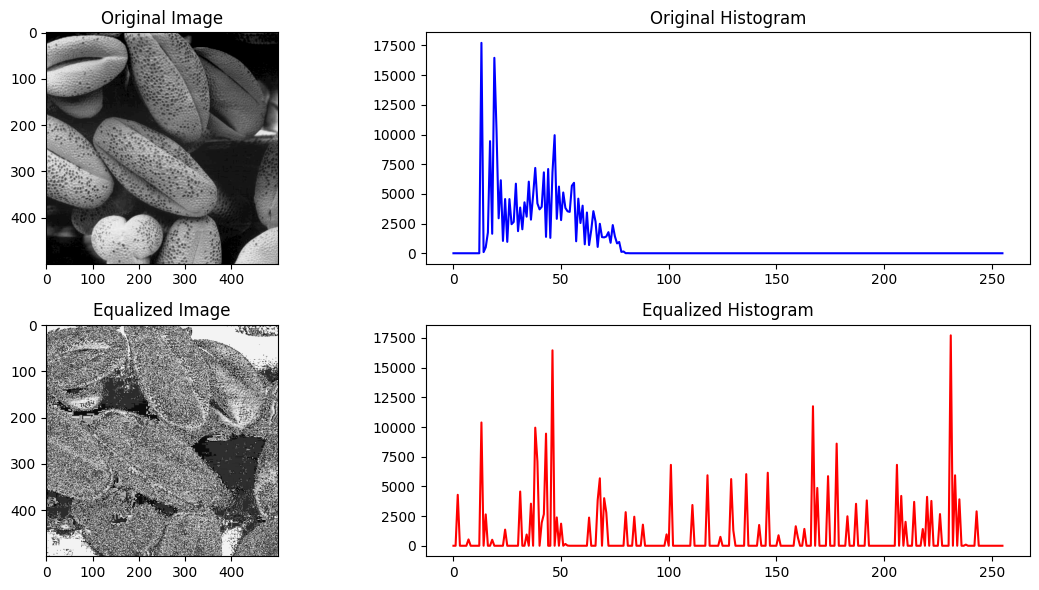

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Calculate the histogram of the input image
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    # Perform histogram equalization by mapping CDF values to new pixel values
    equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    equalized_image = equalized_image.reshape(image.shape).astype(np.uint8)
    equalized_image = np.clip(equalized_image, 0, 255).astype(np.uint8)
    # Calculate the histogram of the equalized image
    equalized_hist, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])
    
    return equalized_image, hist, equalized_hist

# Load a grayscale image
# image_path = 'grayscale_image.jpg'
gray_image = cv2.imread('shells.tif', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image, original_hist, equalized_hist = histogram_equalization(gray_image)
equalized_image = np.clip(equalized_image, 0, 255).astype(np.uint8)

# Plot the original and equalized histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.plot(original_hist, color='b')
plt.title('Original Histogram')

plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 2, 4)
plt.plot(equalized_hist, color='r')
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()


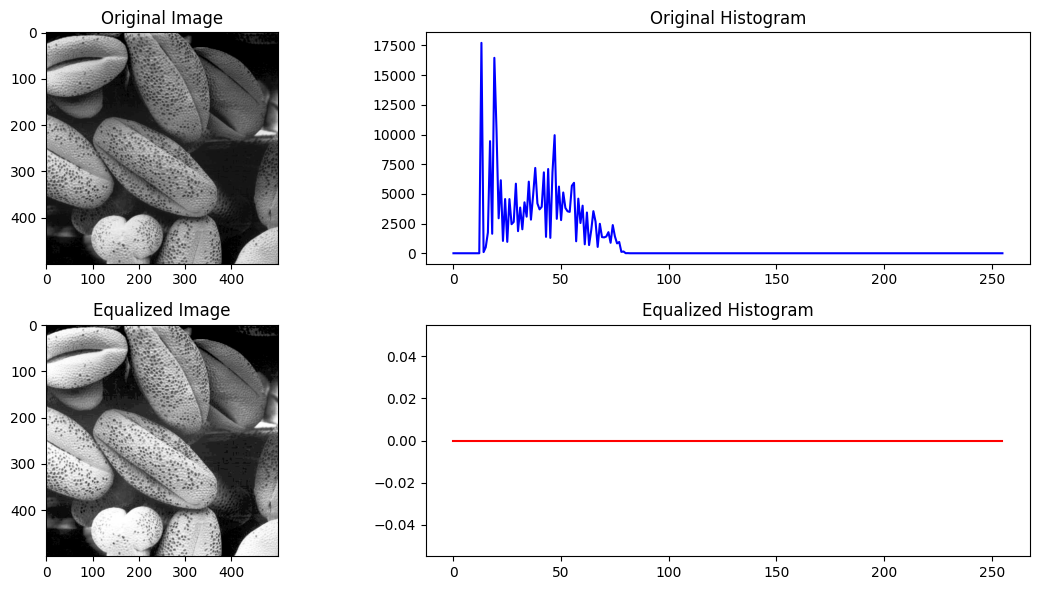

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Calculate the histogram of the input image
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    # Perform histogram equalization by mapping CDF values to new pixel values
    equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    equalized_image = equalized_image.reshape(image.shape)
    
    # Apply np.clip to ensure pixel values are within [0, 255]
    # equalized_image = np.clip(equalized_image, 0, 255).astype(np.uint8)
    
    # Calculate the histogram of the equalized image
    equalized_hist, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])
    
    return equalized_image, hist, equalized_hist

# Load a grayscale image
image_path = 'shells.tif'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image, original_hist, equalized_hist = histogram_equalization(gray_image)

# Plot the original and equalized histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.plot(original_hist, color='b')
plt.title('Original Histogram')

plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 2, 4)
plt.plot(equalized_hist, color='r')
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()


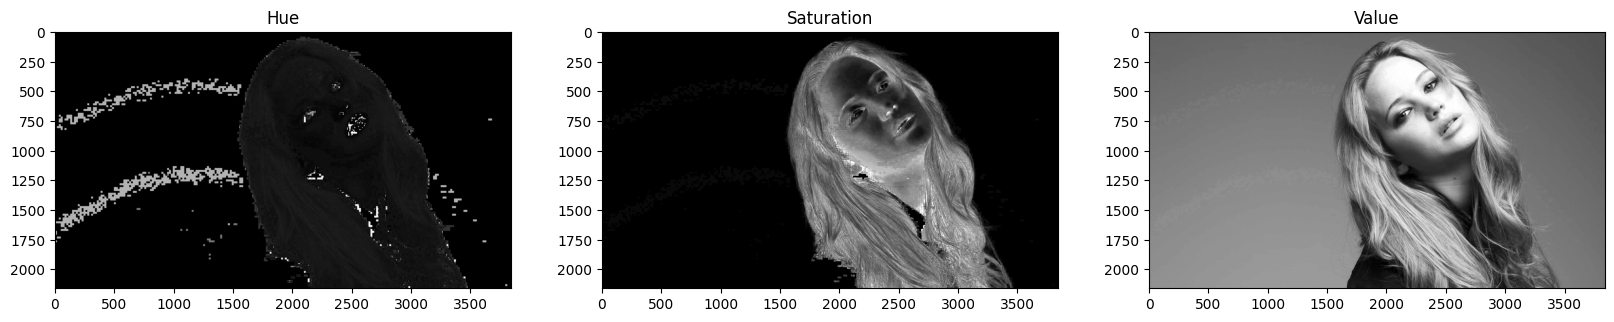

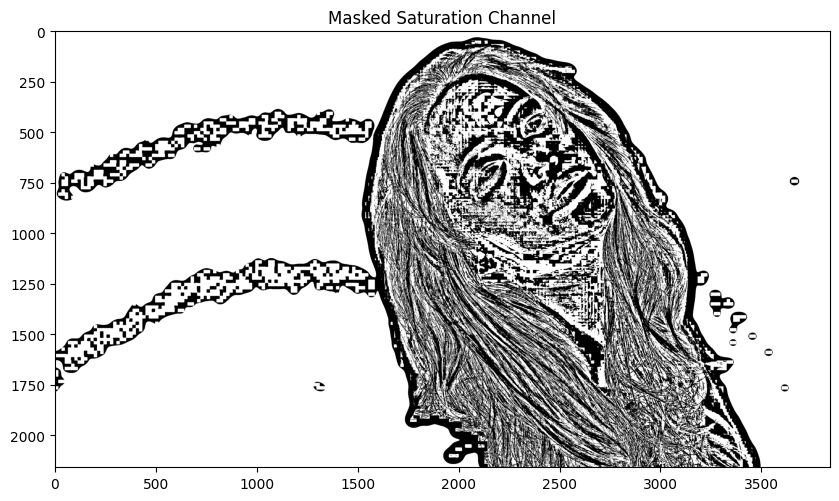

In [16]:
# open an image and convert to hsv plane, split channels and show them
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('jeniffer.jpg', cv2.IMREAD_COLOR)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_hsv)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(h, cmap='gray')
plt.title('Hue')
plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation')
plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value')
plt.show()

th3 = cv2.adaptiveThreshold(s,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,111,2)
# apply the cv.bitwise_and function to the saturation channel and the mask
# s_masked = cv2.bitwise_and(s, th3)
# show the masked saturation channel
plt.figure(figsize=(10, 10))
plt.imshow(th3, cmap='gray')
plt.title('Masked Saturation Channel')
plt.show()


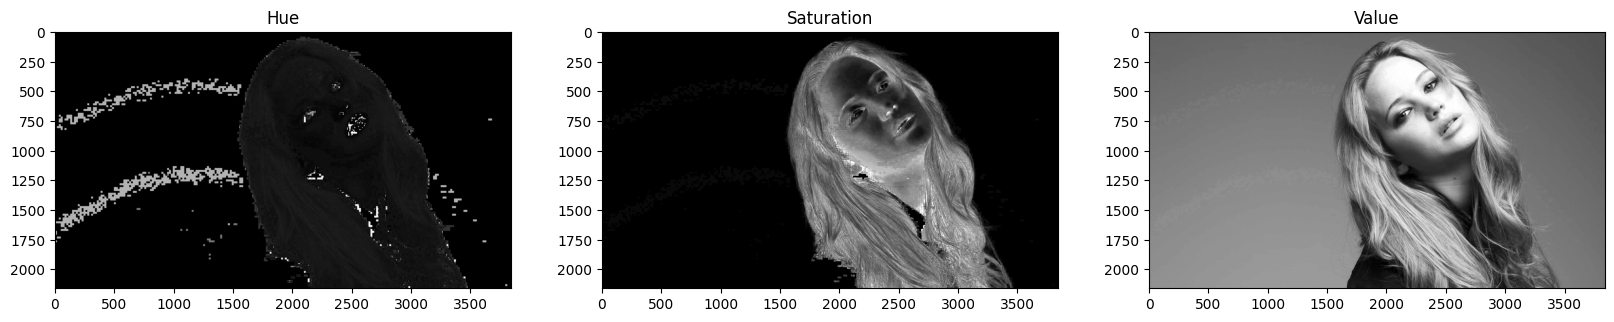

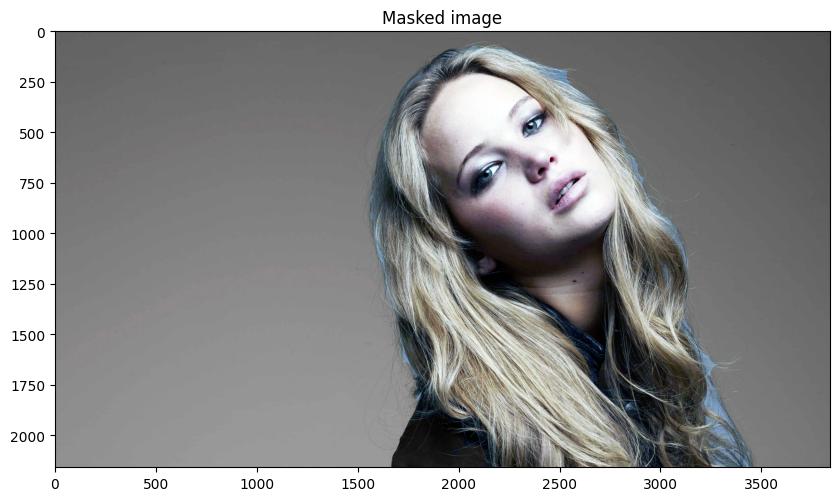

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('jeniffer.jpg', cv2.IMREAD_COLOR)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_hsv)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(h, cmap='gray')
plt.title('Hue')
plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation')
plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value')
plt.show()

# Define a threshold value for saturation
threshold_value = 20

# Create a binary mask for the foreground based on the saturation channel
foreground_mask = np.zeros_like(s)
foreground_mask[s > threshold_value] = 255

foreground_mask = cv2.morphologyEx(foreground_mask, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (80, 80)))
foreground_mask = cv2.erode(foreground_mask, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20)), iterations=1)

background_mask = cv2.bitwise_not(foreground_mask)


# Apply the mask to image to extract foreground objects
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
foreground_r = cv2.bitwise_and(img[:,:,0], foreground_mask)
foreground_g = cv2.bitwise_and(img[:,:,1], foreground_mask)
foreground_b = cv2.bitwise_and(img[:,:,2], foreground_mask)

foreground_r = cv2.equalizeHist(foreground_r)
foreground_g = cv2.equalizeHist(foreground_g)
foreground_b = cv2.equalizeHist(foreground_b)

img_masked = cv2.merge((foreground_r, foreground_g, foreground_b))

background_mask = cv2.bitwise_not(foreground_mask)
#extract the background
background_r = cv2.bitwise_and(img[:,:,0],background_mask)
background_g = cv2.bitwise_and(img[:,:,1],background_mask)
background_b = cv2.bitwise_and(img[:,:,2],background_mask)

background = cv2.merge((background_b, background_g, background_r))

img_new = cv2.add(img_masked, background)

# img_masked = cv2.cvtColor(img_masked, cv2.COLOR_BGR2GRAY)

# Show the masked saturation channel
plt.figure(figsize=(10, 10))
plt.imshow(img_new)
plt.title('Masked image')
plt.show()
cv2.destroyAllWindows()


In [16]:
import cv2
import numpy as np

def zoom_nearest_neighbor(image, zoom_factor):
    height, width, _ = image.shape
    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)
    new_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    for y in range(new_height):
        for x in range(new_width):
            src_x = int(x / zoom_factor)
            src_y = int(y / zoom_factor)
            new_image[y, x] = image[src_y, src_x]
    
    return new_image

def zoom_bilinear(image, zoom_factor):
    height, width, _ = image.shape
    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)
    new_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    for y in range(new_height):
        for x in range(new_width):
            src_x = x / zoom_factor
            src_y = y / zoom_factor
            
            x1, y1 = int(src_x), int(src_y)
            x2, y2 = x1 + 1, y1 + 1
            
            if x2 >= width:
                x2 = width - 1
            if y2 >= height:
                y2 = height - 1
            
            dx = src_x - x1
            dy = src_y - y1
            
            new_image[y, x] = (
                (1 - dx) * (1 - dy) * image[y1, x1] +
                dx * (1 - dy) * image[y1, x2] +
                (1 - dx) * dy * image[y2, x1] +
                dx * dy * image[y2, x2]
            ).astype(np.uint8)
    
    return new_image

def normalized_ssd(image, zoomed_image):
    image_width, image_height, _ = image.shape
    zoomed_width, zoomed_height, _ = zoomed_image.shape
    if image_width < zoomed_width :
        zoomed_image = zoomed_image[:image_width,:,:]
    elif image_width > zoomed_width :
        image = image[:zoomed_width,:,:]
    
    if image_height < zoomed_height :
        zoomed_image = zoomed_image[:,:image_height,:]
    elif image_height > zoomed_height :
        image = image[:,:zoomed_height,:]

    return np.sum((image - zoomed_image) ** 2) / (image.shape[0] * image.shape[1]*3)

# Load an image
image = cv2.imread('zooming/im02small.png')
image_large = cv2.imread('zooming/im02.png')

# Specify zoom factor (between 0 and 10)
zoom_factor = 4.0

# Zoom using nearest-neighbor interpolation
zoomed_nearest = zoom_nearest_neighbor(image, zoom_factor)

# Zoom using bilinear interpolation
zoomed_bilinear = zoom_bilinear(image, zoom_factor)

ssd_n = normalized_ssd(image_large, zoomed_nearest)
ssd_b = normalized_ssd(image_large, zoomed_bilinear)
print(ssd_n,ssd_b)

# # Display the original and zoomed images
# cv2.imshow('Original Image', image)
# cv2.imshow('Zoomed Nearest Neighbor', zoomed_nearest)
# cv2.imshow('Zoomed Bilinear', zoomed_bilinear)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

small_images=["zooming/im01small.png","zooming/im02small.png","zooming/im03small.png","zooming/im04small.png","zooming/im05small.png","zooming/im06small.png","zooming/im07small.png","zooming/im08small.png","zooming/im09small.png","zooming/im10small.png","zooming/im11small.png","zooming/im12small.png","zooming/im13small.png","zooming/im14small.png","zooming/im15small.png","zooming/im16small.png","zooming/im17small.png","zooming/im18small.png","zooming/im19small.png","zooming/im20small.png"]
original_images=["zooming/im01.png","zooming/im02.png","zooming/im03.png","zooming/im04.png","zooming/im05.png","zooming/im06.png","zooming/im07.png","zooming/im08.png","zooming/im09.png","zooming/im10.png","zooming/im11.png","zooming/im12.png"]
zoom_factor = 4.0
normalized_ssds = []
for i in range(len(small_images)):
    small_image = cv2.imread(small_images[i])
    original_image = cv2.imread(original_images[i])

    # if smal

    zoomed_nearest = zoom_nearest_neighbor(small_image, zoom_factor)
    zoomed_bilinear = zoom_bilinear(small_image, zoom_factor)  
    # get normalized ssd of original and zoomed nearest
    ssd_nearest = normalized_ssd(original_image, zoomed_nearest)
    # get dsd of original and zoomed bilinear
    ssd_bilinear = normalized_ssd(original_image, zoomed_bilinear)

    print( "Image[", i+1 , "] ssd_nearest : ",ssd_nearest," ssd_bilinear : ",ssd_bilinear)

    


11.902013310185184 16.21177662037037
Image[ 1 ] ssd_nearest :  31.284316486625514  ssd_bilinear :  39.257033179012346
Image[ 2 ] ssd_nearest :  11.902013310185184  ssd_bilinear :  16.21177662037037
Image[ 3 ] ssd_nearest :  17.171342909907853  ssd_bilinear :  22.376757387099232
Image[ 4 ] ssd_nearest :  78.73781724215534  ssd_bilinear :  81.65874063625257
Image[ 5 ] ssd_nearest :  50.57724609375  ssd_bilinear :  53.70764858217593
Image[ 6 ] ssd_nearest :  30.553995949074075  ssd_bilinear :  35.51769129372428
Image[ 7 ] ssd_nearest :  27.964142659505207  ssd_bilinear :  30.22005997721354
Image[ 8 ] ssd_nearest :  14.37148410910911  ssd_bilinear :  19.219769269269268
Image[ 9 ] ssd_nearest :  21.148100694444445  ssd_bilinear :  26.669085590277778
Image[ 10 ] ssd_nearest :  21.42844935276991  ssd_bilinear :  25.21551477169893
Image[ 11 ] ssd_nearest :  94.7471351111111  ssd_bilinear :  94.56599555555556


AttributeError: 'NoneType' object has no attribute 'shape'

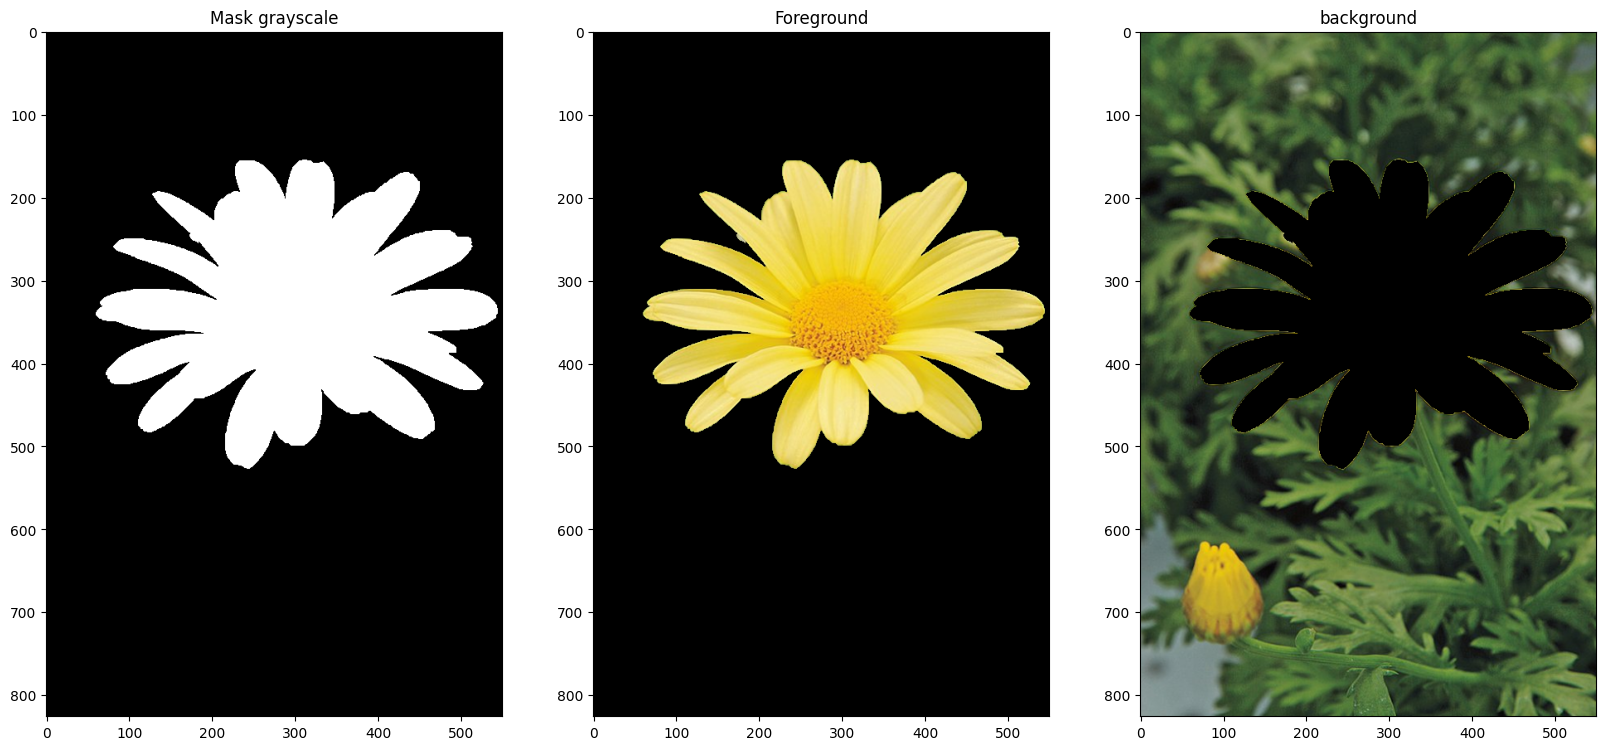

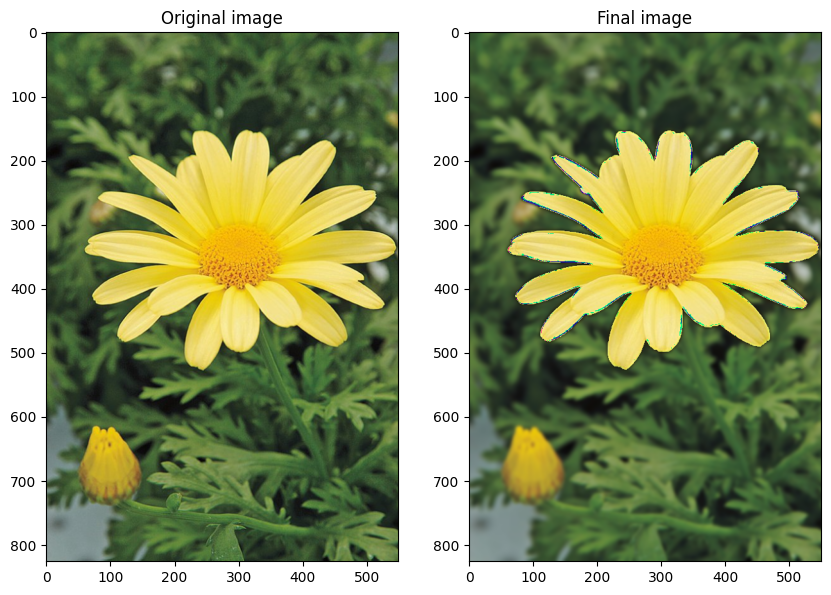

In [30]:
import numpy as np
import cv2 as cv

from matplotlib import pyplot as plt
img = cv.imread('flower.png',cv.IMREAD_COLOR)


rect = (50,150,500,380)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
mask = np.zeros(img.shape[:2],np.uint8)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
foreground = img * mask2[:, :, np.newaxis]
background = img - foreground
blurred_background = cv.GaussianBlur(background, (13, 13), 0)
final_image = blurred_background + foreground
final_image = cv.cvtColor(final_image, cv.COLOR_BGR2RGB)


plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
img  = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(mask2, cmap='gray')
plt.title('Mask grayscale')
plt.subplot(1, 3, 2)
foreground = cv.cvtColor(foreground, cv.COLOR_BGR2RGB)
plt.imshow(foreground)
plt.title('Foreground')
plt.subplot(1, 3, 3)
background = cv.cvtColor(background, cv.COLOR_BGR2RGB)
plt.imshow(background)
plt.title('background')
plt.show()

plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(final_image)
plt.title('Final image')
plt.show()

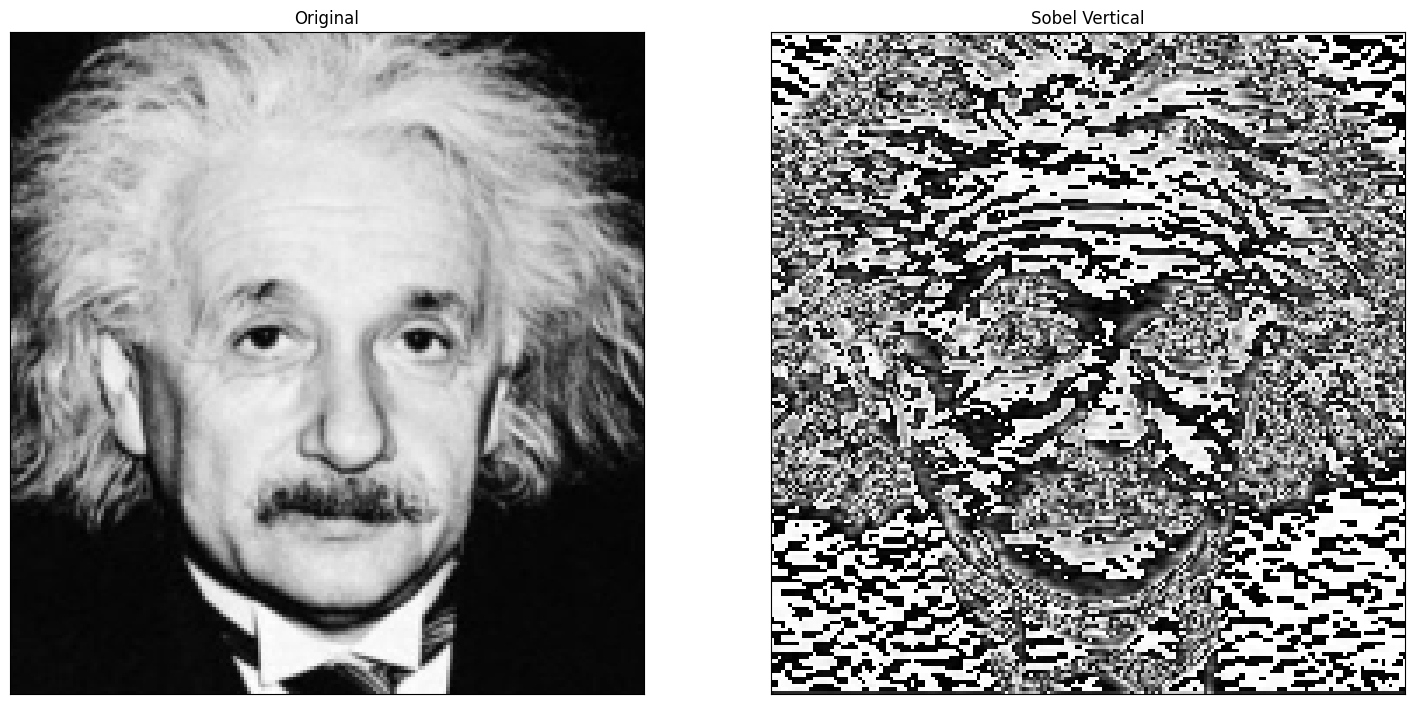

In [35]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def filter_image(image, kernel):
    image_height, image_width= image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.zeros((image_height + pad_height * 2, image_width + pad_width * 2), dtype=np.uint8)

    padded_image[pad_height:-pad_height, pad_width:-pad_width] = image

    filtered_image = np.zeros(image.shape, dtype=np.uint8)
    for y in range(image_height):
        for x in range(image_width):
            patch = padded_image[y:y + kernel_height, x:x + kernel_width]
            filtered_image[y, x] = np.sum(patch * kernel)
    filtered_image = cv.bitwise_not(filtered_image)
    return filtered_image

img = cv.imread('einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
# kernel = np.array([(-1,  0, 1), (-2, 0, 2), (-1, 0, 1 )], dtype='float')


# imgc = cv.filter2D(img,-1,kernel)

# fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
# axes[0].imshow(img, cmap='gray')
# axes[0].set_title('Original')
# axes[0].set_xticks([]), axes[0].set_yticks([])
# axes[1].imshow(imgc, cmap='gray')
# axes[1].set_title('Sobel Vertical')
# axes[1].set_xticks([]), axes[1].set_yticks([])
# plt.show()

imgd = filter_image(img , kernel)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18)) 
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgd, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()


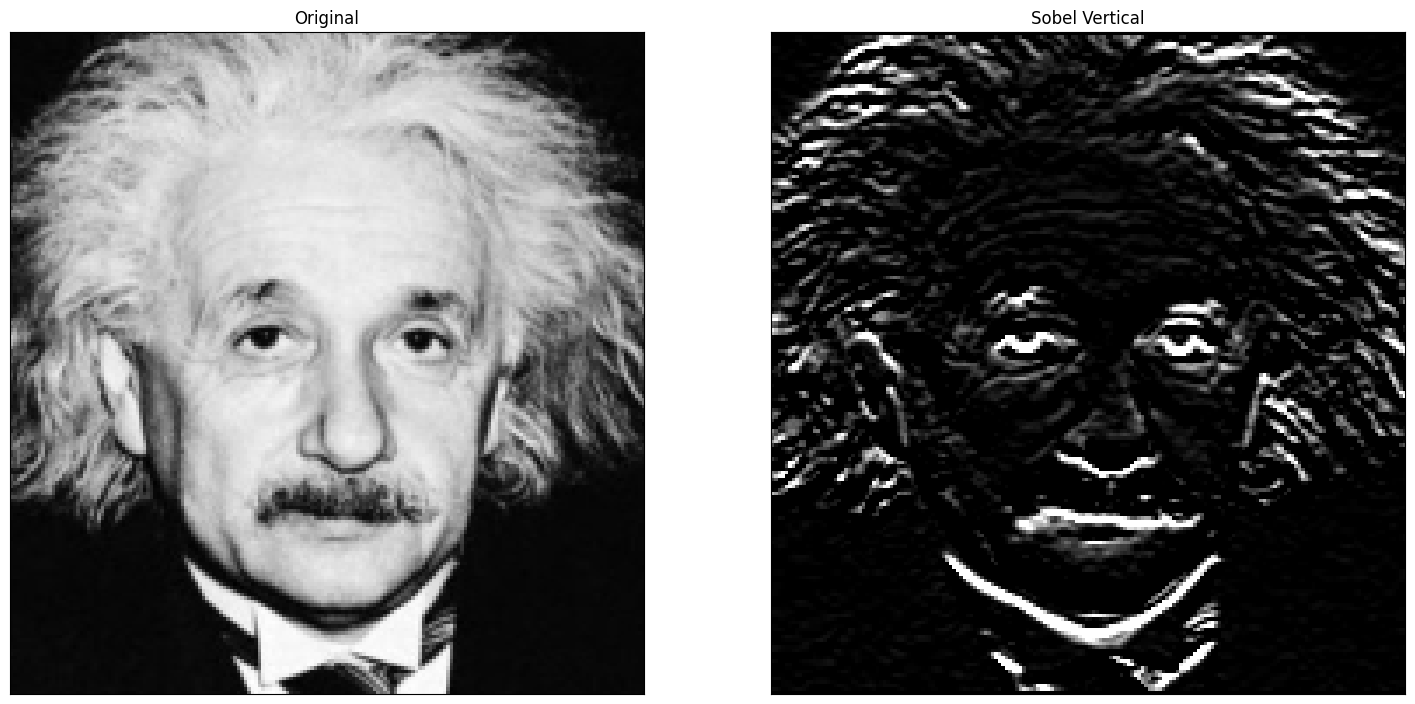

In [33]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Sobel vertical
kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
imgc = cv.filter2D(img,-1,kernel)



fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()